In [2]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [3]:
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_gt = pd.read_csv('./../../data/network_stats.csv', parse_dates=['date'])
df_gt.query('window_length == 29 & threshold == 0.5', inplace=True)
df_gt.tail()

,date,window_length,threshold,density,transitivity,assortativity
4444,2022-01-30,29,0.5,0.156851,0.103760,0.214072
4447,2022-01-31,29,0.5,0.157817,0.103354,0.282305
4450,2022-02-01,29,0.5,0.154378,0.100751,0.344551
4453,2022-02-02,29,0.5,0.157315,0.102334,0.365635
4456,2022-02-03,29,0.5,0.156156,0.102847,0.377568


In [5]:
df_gt_sqrt_diff = pd.read_csv('../../data/network_stats.square_diff.csv', parse_dates=['date'])
df_gt_sqrt_diff.query('window_length == 29 & threshold == 0.5', inplace=True)
df_gt_sqrt_diff.tail()

,date,window_length,threshold,density,transitivity,assortativity
4438,2022-01-30,29,0.5,0.112296,0.072980,0.166227
4441,2022-01-31,29,0.5,0.111717,0.072826,0.185952
4444,2022-02-01,29,0.5,0.117861,0.075545,0.175110
4447,2022-02-02,29,0.5,0.108509,0.071184,0.166466
4450,2022-02-03,29,0.5,0.101360,0.068462,0.243239


In [6]:
df_pandemic = pd.read_csv('./../../data/external/pandemic/pandemic_network.csv', parse_dates=['date'], dayfirst=True)
df_pandemic.rename(columns={
    "edge_density": "density",
    "CC_global": "transitivity",
}, inplace=True)
df_pandemic.head()

,date,density,transitivity,assortativity
0,2020-02-04,0.115942,0.669903,0.329375
1,2020-02-05,0.112319,0.620690,0.261905
2,2020-02-06,0.101449,0.640000,0.279921
3,2020-02-07,0.083333,0.625000,-0.031034
4,2020-02-08,0.083004,0.638298,-0.194611


In [7]:
df_SRS = pd.read_csv('../../data/external/pandemic/risk_score.csv', parse_dates=['date'], dayfirst=True)
df_SRS.query('weight_type == "SRS"', inplace=True)
df_SRS.rename(columns={
    "riskScore": "SRS"
}, inplace=True)
df_SRS.tail()

,date,SRS,weight_type
738,2022-02-11,1.463082,SRS
739,2022-02-12,1.525109,SRS
740,2022-02-13,1.499026,SRS
741,2022-02-14,1.398109,SRS
742,2022-02-15,1.307241,SRS


In [8]:
df_sqrt_score = pd.read_csv('../../data/processed/external/sqrt_srs_score.csv', parse_dates=['date'])
df_sqrt_score.head()

,date,sqrt_SRS
0,2020-02-04,0.000960
1,2020-02-05,0.000944
2,2020-02-06,0.000888
3,2020-02-07,0.000891
4,2020-02-08,0.000892


In [9]:
df_sqrt_score_melt = pd.melt(
    df_sqrt_score, id_vars="date", value_vars=['sqrt_SRS'],
    value_name='SRS'
)
df_sqrt_score_melt.drop(columns=['variable'], inplace=True)
df_sqrt_score_melt.tail()

,date,SRS
738,2022-02-11,1.209579
739,2022-02-12,1.234953
740,2022-02-13,1.224347
741,2022-02-14,1.182416
742,2022-02-15,1.143346


In [10]:
# _metrics = ['density', 'transitivity', 'assortativity']
_metrics = ['density', 'transitivity']
_metrics_text = ['Network Density', 'Clustering Coefficient']

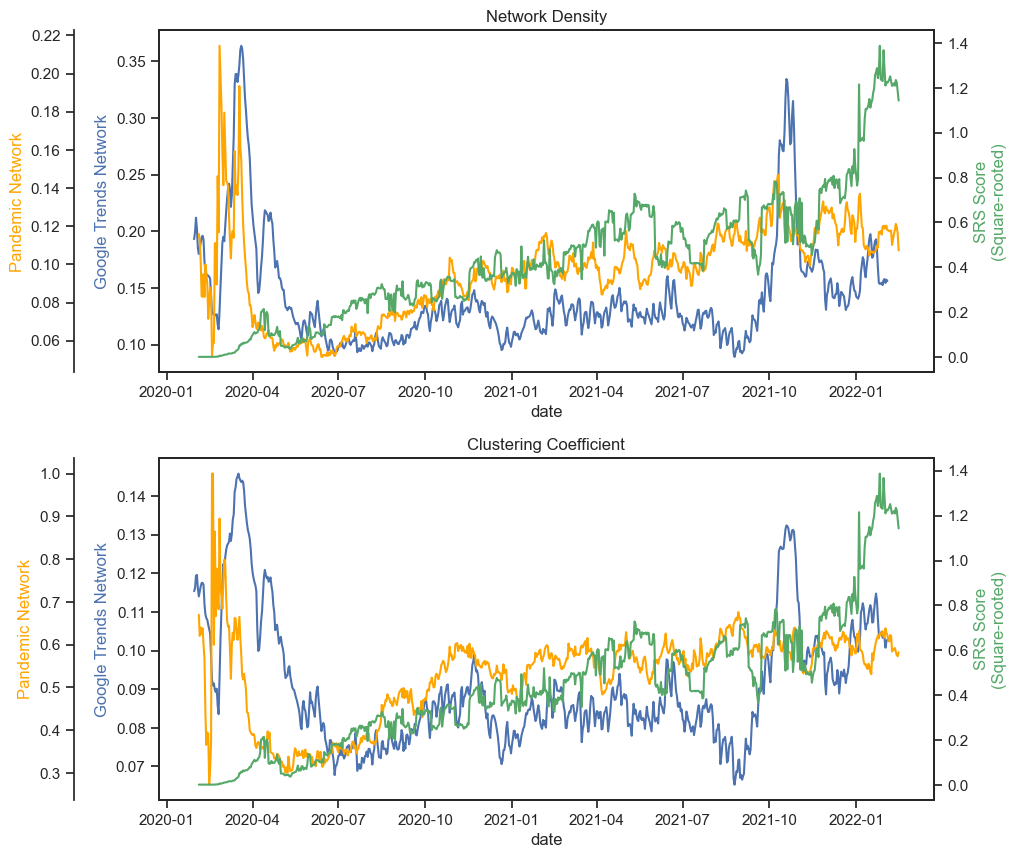

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("ticks")

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

for col_index in range(len(_metrics)):
    metric = _metrics[col_index]
    text_metric = _metrics_text[col_index]

    left_axis = axs[col_index]
    left_2_axis = left_axis.twinx()
    right_2_axis = left_axis.twinx()

    left_axis.set_title(text_metric)

    line1 = sns.lineplot(
        data=df_gt,
        x="date", y=metric, color="b",
        label="Googe Trends", legend=False,
        ax=left_axis
    )
    left_axis.set_ylabel("Google Trends Network")
    left_axis.yaxis.label.set_color("b")

    line2 = sns.lineplot(
        data=df_pandemic,
        x="date", y=metric, color="orange",
        label="Pandemic", legend=False,
        ax=left_2_axis,
        # alpha=0
    )
    left_2_axis.yaxis.set_label_position('left')
    left_2_axis.yaxis.set_ticks_position('left')
    left_2_axis.set_ylabel("Pandemic Network")
    left_2_axis.spines.left.set_position(("axes", -0.11))
    left_2_axis.yaxis.label.set_color("orange")
    
    line3 = sns.lineplot(
        data=df_sqrt_score_melt,
        x="date", y="SRS", color="g",
        label="SRS Score (SQRT)", legend=False,
        ax=right_2_axis,
        # alpha=0
    )
    right_2_axis.set_ylabel("SRS Score\n(Square-rooted)")
    right_2_axis.yaxis.label.set_color("g")

plt.savefig('../../graphs/Figure08_NetworkStats_GT-vs-pandemic_SQRTSRS.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Figure08_NetworkStats_GT-vs-pandemic_SQRTSRS.png', bbox_inches='tight')
plt.show()